# Final Project - Sports Car Dataset <hr style= "border:2px solid green">

## DATA CLEANING

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [17]:
df = pd.read_csv(r"..\raw\SportsCarDataset.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Manufacturer             1514 non-null   object 
 1   Car Make                 1514 non-null   object 
 2   Car Model                1508 non-null   object 
 3   Year                     1513 non-null   float64
 4   Engine Size (L)          1523 non-null   float64
 5   Horsepower               1524 non-null   float64
 6   Torque (lb-ft)           1530 non-null   float64
 7   0-60 MPH Time (seconds)  1524 non-null   float64
 8   Price (in USD)           1501 non-null   object 
dtypes: float64(5), object(4)
memory usage: 118.0+ KB


In [18]:
df.head()

,Manufacturer,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,McLaren Automotive,McLaren,488 GTB,2023.0,5.2,363.0,546.0,4.0,"274,390"
1,NaN,NaN,Huracan,2022.0,4.0,705.0,507.0,2.8,"274,390"
2,Ferrari N.V.,Ferrari,Huracan,2023.0,3.0,704.0,580.0,4.0,"101,200"
3,Ferrari N.V.,Ferrari,911,2022.0,5.2,372.0,367.0,4.0,"333,750"
4,Automobili Lamborghini S.p.A.,Lamborghini,NaN,2023.0,3.0,721.0,332.0,NaN,"298,000"


In [19]:
df.isna().sum()

Manufacturer               162
Car Make                   162
Car Model                  168
Year                       163
Engine Size (L)            153
Horsepower                 152
Torque (lb-ft)             146
0-60 MPH Time (seconds)    152
Price (in USD)             175
dtype: int64

In [20]:
df = df.dropna(subset=['Manufacturer','Car Make','Car Model','Year','Engine Size (L)',
                       'Horsepower','Torque (lb-ft)','0-60 MPH Time (seconds)','Price (in USD)'])
df.isna().sum()

Manufacturer               0
Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 1673
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Manufacturer             741 non-null    object 
 1   Car Make                 741 non-null    object 
 2   Car Model                741 non-null    object 
 3   Year                     741 non-null    float64
 4   Engine Size (L)          741 non-null    float64
 5   Horsepower               741 non-null    float64
 6   Torque (lb-ft)           741 non-null    float64
 7   0-60 MPH Time (seconds)  741 non-null    float64
 8   Price (in USD)           741 non-null    object 
dtypes: float64(5), object(4)
memory usage: 57.9+ KB


In [23]:
df = df.copy()

# Convert 'Year' to integer
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int)

# Convert 'Price (in USD)' to numeric by removing commas and handling missing values
df['Price (in USD)'] = df['Price (in USD)'].replace({',': ''}, regex=True) #replacing comma with '' ex. 11,11=1111
df['Price (in USD)'] = pd.to_numeric(df['Price (in USD)'])


In [31]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
              Year  Engine Size (L)  Horsepower  Torque (lb-ft)  \
count   741.000000       741.000000  741.000000      741.000000   
mean   2022.036437         4.027665  557.724696      443.763833   
std       0.810419         0.776707  145.341749       86.053453   
min    2021.000000         3.000000  300.000000      300.000000   
25%    2021.000000         3.900000  432.000000      371.000000   
50%    2022.000000         3.900000  559.000000      438.000000   
75%    2023.000000         4.000000  689.000000      523.000000   
max    2023.000000         5.200000  799.000000      599.000000   

       0-60 MPH Time (seconds)  Price (in USD)  
count               741.000000      741.000000  
mean                  3.114845   227158.205128  
std                   0.447239    91896.846756  
min                   2.700000   101200.000000  
25%                   2.800000   142700.000000  
50%                   3.000000   274390.000000  
75%                   3.20000

## DATA ANALYSIS

Distribution of Cars Across Manufacturers

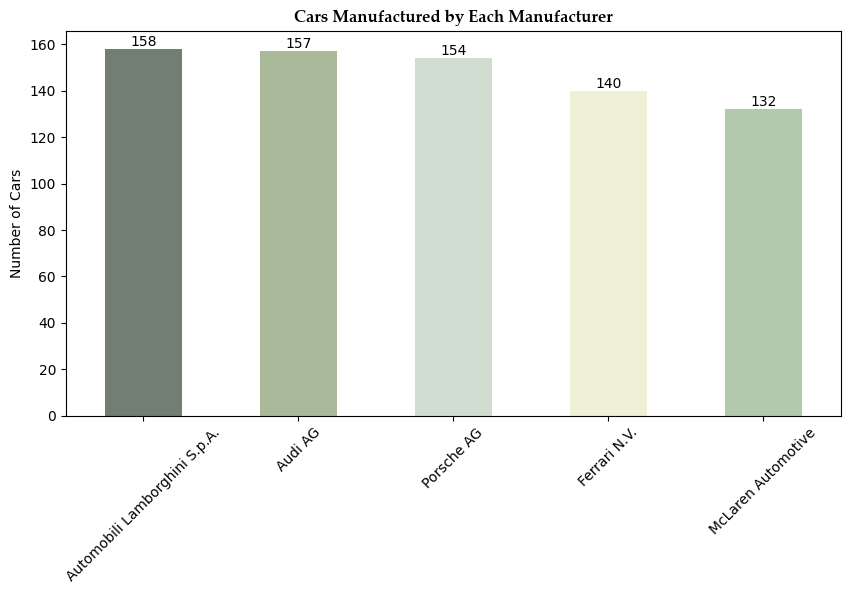

In [37]:
# Count the number of cars per manufacturer
manufacturer_count = df['Manufacturer'].value_counts()

# Plot the bar chart
chart = manufacturer_count.plot(kind='bar',
                                color=['#727D73','#AAB99A','#D0DDD0','#F0F0D7','#B2C9AD'],
                                figsize=(10,5))

# Adding labels to the bars
chart.bar_label(chart.containers[0], label_type='edge')

# Adding title and labels
plt.title('Cars Manufactured by Each Manufacturer',
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(manufacturer_count.index, rotation=45)
plt.ylabel('Number of Cars')

# Display the plot
plt.show()


Correlation between Horsepower, Torque, and 0-60 MPH Time(Heatmap)


Correlation Matrix (Horsepower, Torque, 0-60 MPH Time):
                         Horsepower  Torque (lb-ft)  0-60 MPH Time (seconds)
Horsepower                 1.000000        0.036415                -0.000022
Torque (lb-ft)             0.036415        1.000000                -0.034308
0-60 MPH Time (seconds)   -0.000022       -0.034308                 1.000000


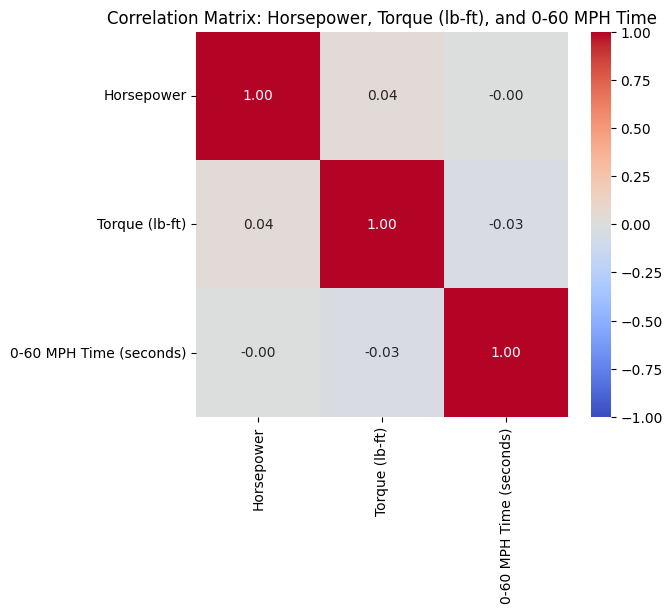

In [33]:
# Select only the relevant columns: Horsepower, Torque (lb-ft), and 0-60 MPH Time
correlation_data = df[['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix (Horsepower, Torque, 0-60 MPH Time):")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix: Horsepower, Torque (lb-ft), and 0-60 MPH Time")
plt.show()


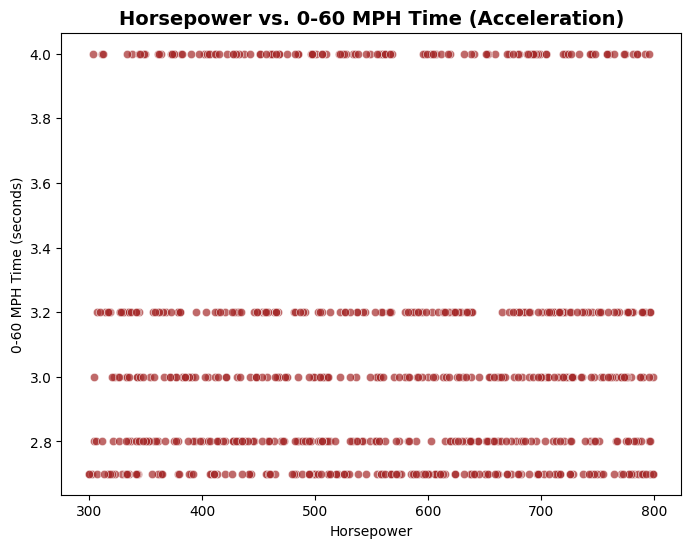

Correlation between Horsepower and 0-60 MPH Time: -0.00


In [38]:
# Scatter plot to visualize the relationship between Horsepower and 0-60 MPH Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Horsepower'], y=df['0-60 MPH Time (seconds)'], 
                color='brown', alpha=0.7)
plt.title('Horsepower vs. 0-60 MPH Time (Acceleration)',
          fontsize=14, fontweight='bold')
plt.xlabel('Horsepower')
plt.ylabel('0-60 MPH Time (seconds)')
plt.show()

# Calculate the correlation coefficient between Horsepower and 0-60 MPH Time
correlation = df['Horsepower'].corr(df['0-60 MPH Time (seconds)'])

print(f"Correlation between Horsepower and 0-60 MPH Time: {correlation:.2f}")


Relationship between engine size and performance.

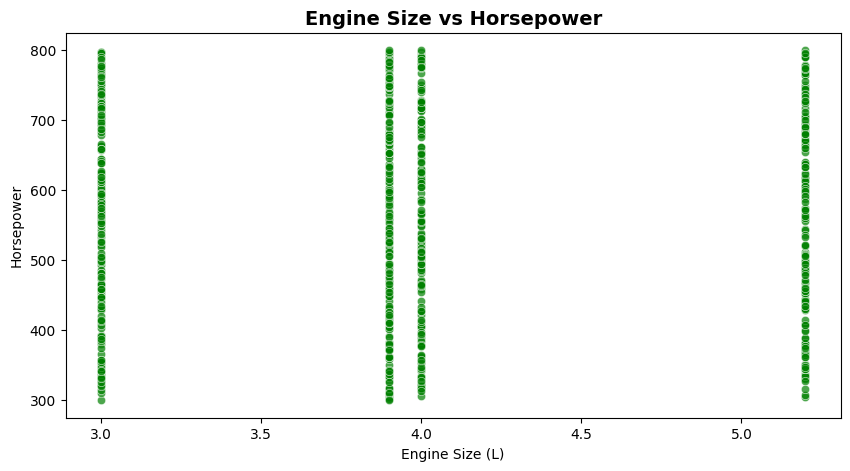

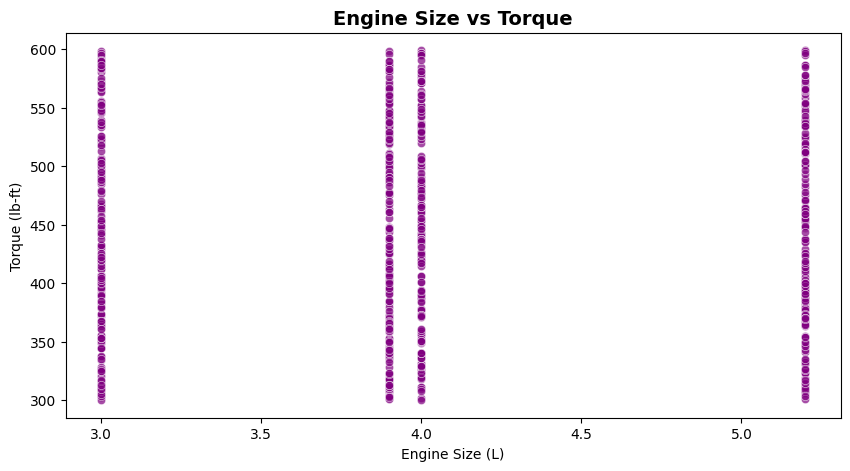

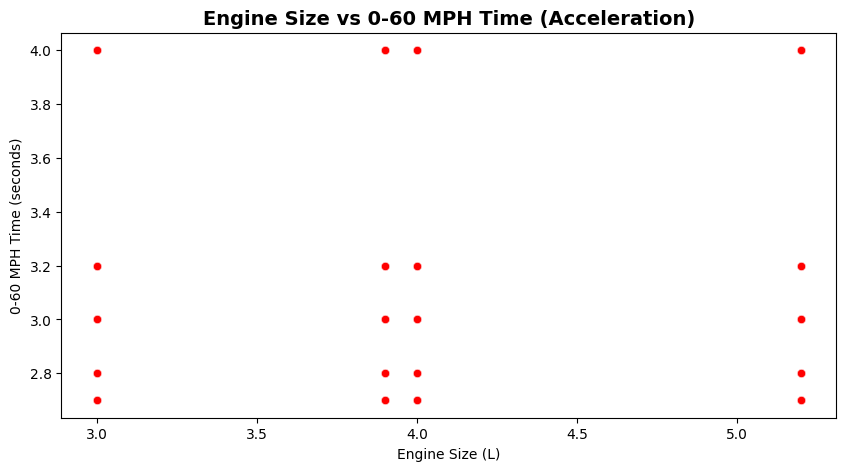

Correlation between Engine Size and Horsepower: -0.01
Correlation between Engine Size and Torque: -0.00
Correlation between Engine Size and 0-60 MPH Time: -0.03


In [39]:
# Scatter plot: Engine Size vs Horsepower
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Engine Size (L)'], y=df['Horsepower'], color='green', alpha=0.7)
plt.title('Engine Size vs Horsepower', fontsize=14, fontweight='bold')
plt.xlabel('Engine Size (L)')
plt.ylabel('Horsepower')
plt.show()

# Scatter plot: Engine Size vs Torque
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Engine Size (L)'], y=df['Torque (lb-ft)'], color='purple', alpha=0.7)
plt.title('Engine Size vs Torque', fontsize=14, fontweight='bold')
plt.xlabel('Engine Size (L)')
plt.ylabel('Torque (lb-ft)')
plt.show()

# Scatter plot: Engine Size vs 0-60 MPH Time
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Engine Size (L)'], y=df['0-60 MPH Time (seconds)'], color='red', alpha=0.7)
plt.title('Engine Size vs 0-60 MPH Time (Acceleration)', fontsize=14, fontweight='bold')
plt.xlabel('Engine Size (L)')
plt.ylabel('0-60 MPH Time (seconds)')
plt.show()

# Correlation coefficients
engine_size_hp_corr = df['Engine Size (L)'].corr(df['Horsepower'])
engine_size_torque_corr = df['Engine Size (L)'].corr(df['Torque (lb-ft)'])
engine_size_accel_corr = df['Engine Size (L)'].corr(df['0-60 MPH Time (seconds)'])

print(f"Correlation between Engine Size and Horsepower: {engine_size_hp_corr:.2f}")
print(f"Correlation between Engine Size and Torque: {engine_size_torque_corr:.2f}")
print(f"Correlation between Engine Size and 0-60 MPH Time: {engine_size_accel_corr:.2f}")


Correlation of price correlate with engine size, horsepower, and acceleration?


Correlation of Price with Engine Size, Horsepower, and 0-60 MPH Time (per Manufacturer):
Price (in USD)                 Price (in USD)  Engine Size (L)  Horsepower  \
Manufacturer                                                                 
Audi AG                                   1.0        -0.045581   -0.072598   
Automobili Lamborghini S.p.A.             1.0        -0.041217   -0.092204   
Ferrari N.V.                              1.0         0.028572    0.048355   
McLaren Automotive                        1.0         0.090469    0.073474   
Porsche AG                                1.0         0.068147    0.056508   

Price (in USD)                 0-60 MPH Time (seconds)  
Manufacturer                                            
Audi AG                                      -0.010856  
Automobili Lamborghini S.p.A.                 0.034068  
Ferrari N.V.                                 -0.002281  
McLaren Automotive                           -0.195302  
Porsche AG           

C:\Users\drano\AppData\Local\Temp\ipykernel_20920\622417772.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  manufacturer_corr = df.groupby('Manufacturer').apply(


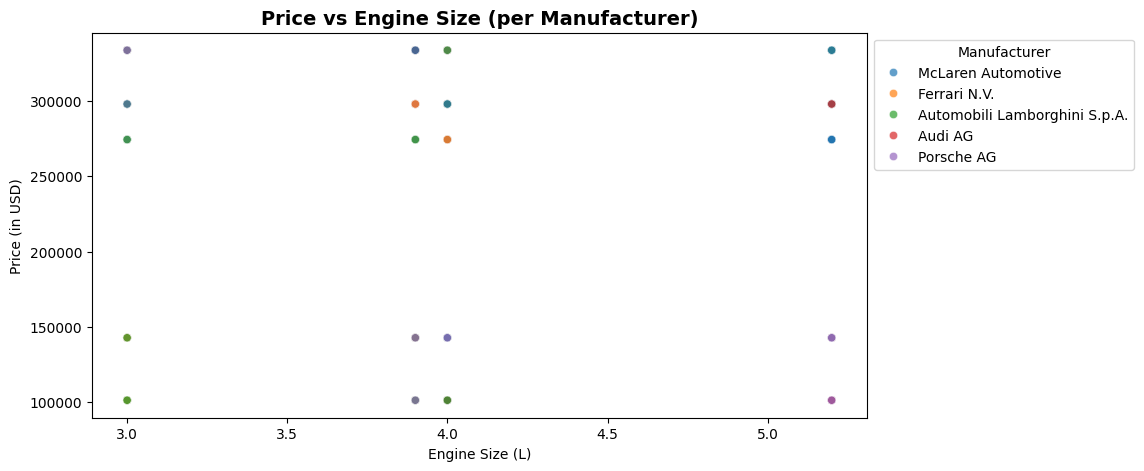

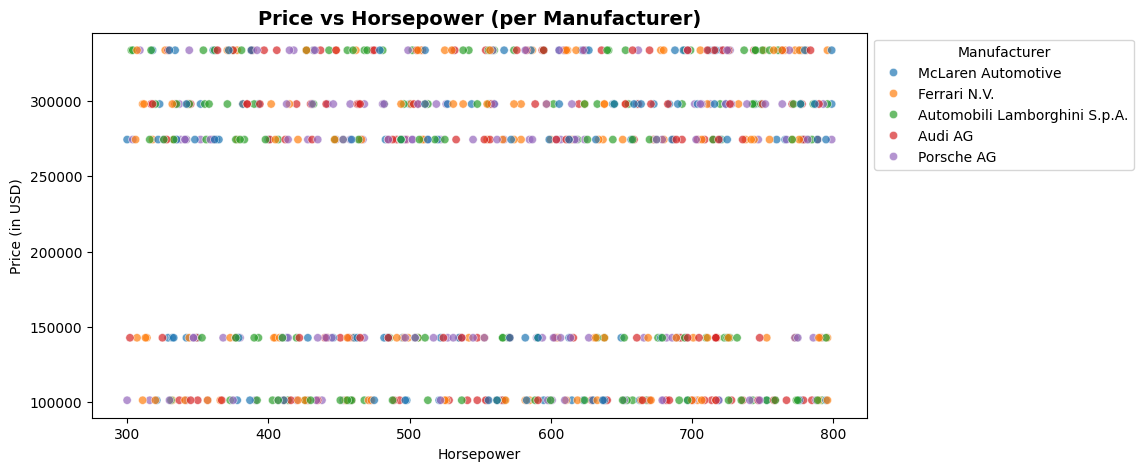

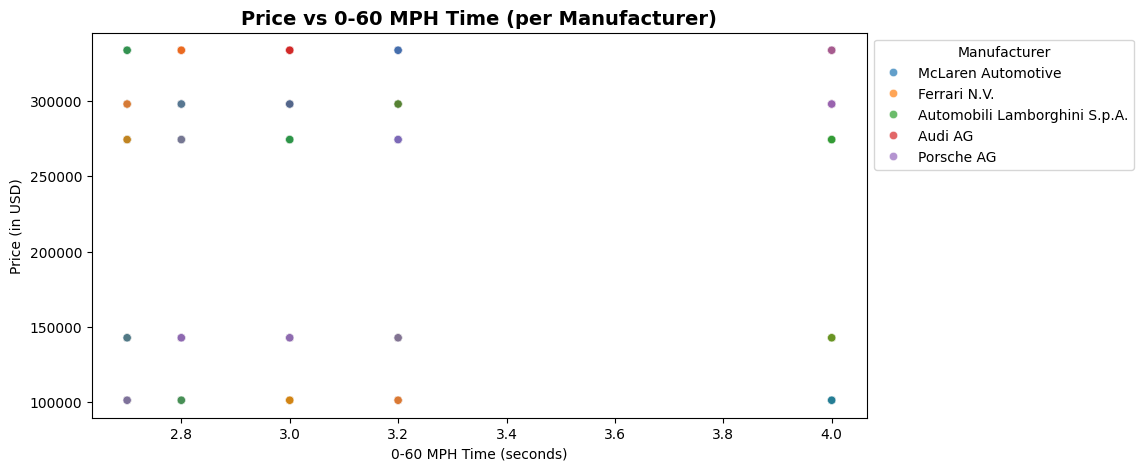

In [41]:
# Calculate correlation for each manufacturer
manufacturer_corr = df.groupby('Manufacturer').apply(
    lambda group: group[['Price (in USD)', 'Engine Size (L)', 'Horsepower', '0-60 MPH Time (seconds)']].corr().loc['Price (in USD)']
)

# Display correlation for each manufacturer
print("\nCorrelation of Price with Engine Size, Horsepower, and 0-60 MPH Time (per Manufacturer):")
print(manufacturer_corr)

# Visualize the relationships using scatter plots

# Price vs Engine Size for each manufacturer
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Engine Size (L)', y='Price (in USD)', hue='Manufacturer', palette='tab10', alpha=0.7)
plt.title('Price vs Engine Size (per Manufacturer)', fontsize=14, fontweight='bold')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (in USD)')
plt.legend(title='Manufacturer', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Price vs Horsepower for each manufacturer
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Horsepower', y='Price (in USD)', hue='Manufacturer', palette='tab10', alpha=0.7)
plt.title('Price vs Horsepower (per Manufacturer)', fontsize=14, fontweight='bold')
plt.xlabel('Horsepower')
plt.ylabel('Price (in USD)')
plt.legend(title='Manufacturer', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Price vs 0-60 MPH Time for each manufacturer
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='0-60 MPH Time (seconds)', y='Price (in USD)', hue='Manufacturer', palette='tab10', alpha=0.7)
plt.title('Price vs 0-60 MPH Time (per Manufacturer)', fontsize=14, fontweight='bold')
plt.xlabel('0-60 MPH Time (seconds)')
plt.ylabel('Price (in USD)')
plt.legend(title='Manufacturer', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Price trend for every manufacturers over time

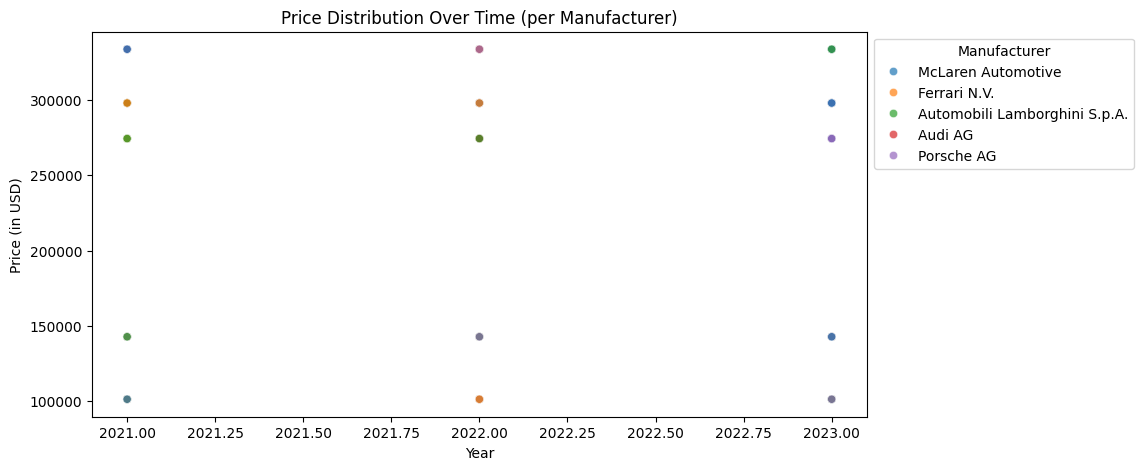

In [46]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Year', y='Price (in USD)', hue='Manufacturer', palette='tab10', alpha=0.7)
plt.title('Price Distribution Over Time (per Manufacturer)')
plt.xlabel('Year')
plt.ylabel('Price (in USD)')
plt.legend(title='Manufacturer', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



# new

Price Trends Analysis

<Figure size 1200x600 with 0 Axes>

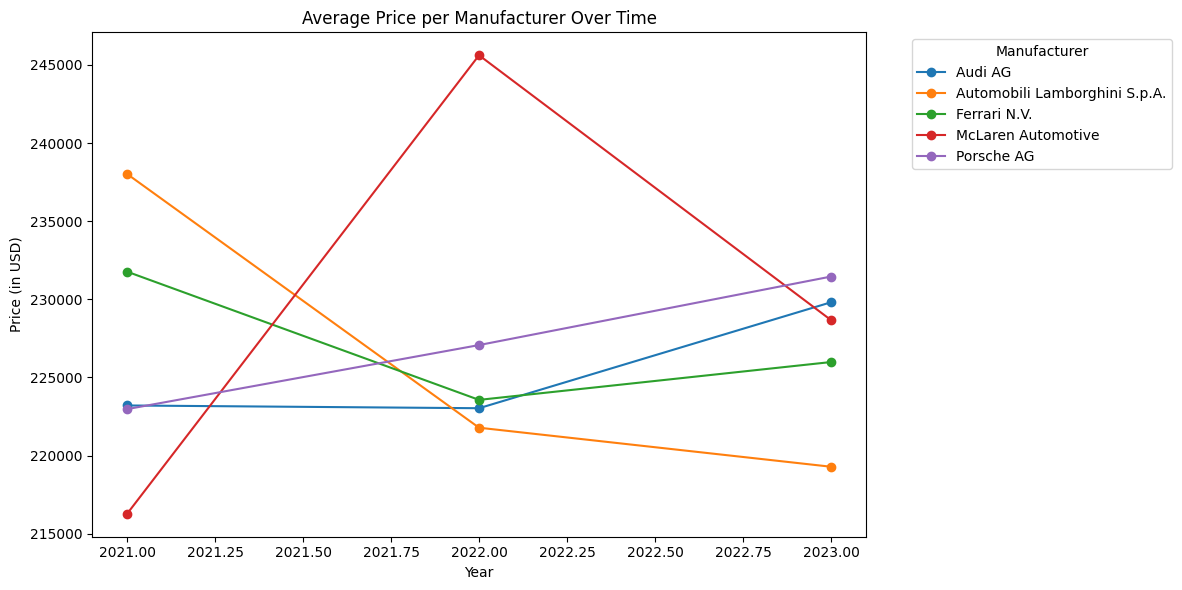

In [48]:
# Group by 'Year' and 'Manufacturer' to calculate the average price per year and manufacturer
avg_price_per_year = df.groupby(['Year', 'Manufacturer'])['Price (in USD)'].mean().unstack()

# Plot the average price per manufacturer over time (year)
plt.figure(figsize=(12, 6))
avg_price_per_year.plot(kind='line', marker='o', linestyle='-', figsize=(12, 6))
plt.title("Average Price per Manufacturer Over Time")
plt.xlabel("Year")
plt.ylabel("Price (in USD)")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


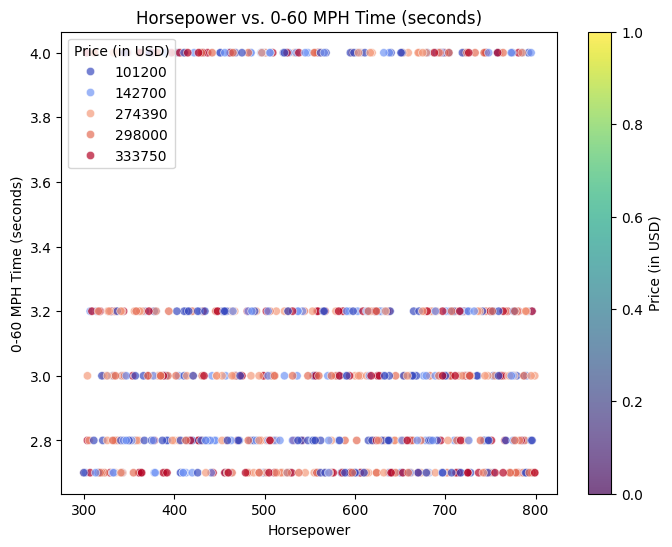

In [54]:
# Horsepower vs. 0-60 MPH Time with Price as color
plt.figure(figsize=(8, 6))

# Create the scatter plot
scatter = sns.scatterplot(x=df['Horsepower'], y=df['0-60 MPH Time (seconds)'], hue=df['Price (in USD)'], palette='coolwarm', alpha=0.7)

# Add a color bar using the scatter plot's hue
plt.colorbar(scatter.collections[0], label='Price (in USD)')

plt.title("Horsepower vs. 0-60 MPH Time (seconds)")
plt.xlabel("Horsepower")
plt.ylabel("0-60 MPH Time (seconds)")
plt.show()